## Libraries

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#import joblib

import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings(action='ignore')

## Data Loading

In [2]:
data=pd.read_csv('processed.csv')

In [3]:
data.head(5)

,password,strength,length,capital,small,special,numeric
0,kzde5577,1,8,0,4,0,4
1,kino3434,1,8,0,4,0,4
2,visi7k1yr,1,9,0,7,0,2
3,megzy123,1,8,0,5,0,3
4,lamborghin1,1,11,0,10,0,1


In [5]:
data.shape

(669639, 7)

## Data Processing

In [20]:
maping={0:'Weak', 1:'Medium', 2:'Strong'}
data['strength']=data['strength'].replace(maping)
data.head(5)

,password,strength,length,capital,small,special,numeric
0,kzde5577,Medium,8,0,4,0,4
1,kino3434,Medium,8,0,4,0,4
2,visi7k1yr,Medium,9,0,7,0,2
3,megzy123,Medium,8,0,5,0,3
4,lamborghin1,Medium,11,0,10,0,1


Split data into atributes (x) and class (y)

In [22]:
y=data['strength'].values
x=data[['length', 'capital', 'small', 'special', 'numeric']].values

In [23]:
x.shape

(669639, 5)

## Model Building

In [24]:
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(535711, 5) (535711,)
(133928, 5) (133928,)


In [25]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [26]:
model=MLPClassifier(hidden_layer_sizes=(16, 16), max_iter=300)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(16, 16), max_iter=300)

In [27]:
y_pred=model.predict(X_test)

In [28]:
print(f"The accuracy of the model is: {np.round(accuracy_score(y_test, y_pred)*100, 3)}%")

The accuracy of the model is: 100.0%


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17908
           1       1.00      1.00      1.00     99519
           2       1.00      1.00      1.00     16501

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928



In [29]:
print("The confusion matrix is: ")
cf=confusion_matrix(y_test, y_pred)
print(cf)

The confusion matrix is: 
[[99519     0     0]
 [    0 16501     0]
 [    0     0 17908]]


In [17]:
# If you want to save the model
# import joblib
# joblib.dump(sc, 'scaler.pkl')
# joblib.dum(model, 'model.pkl')

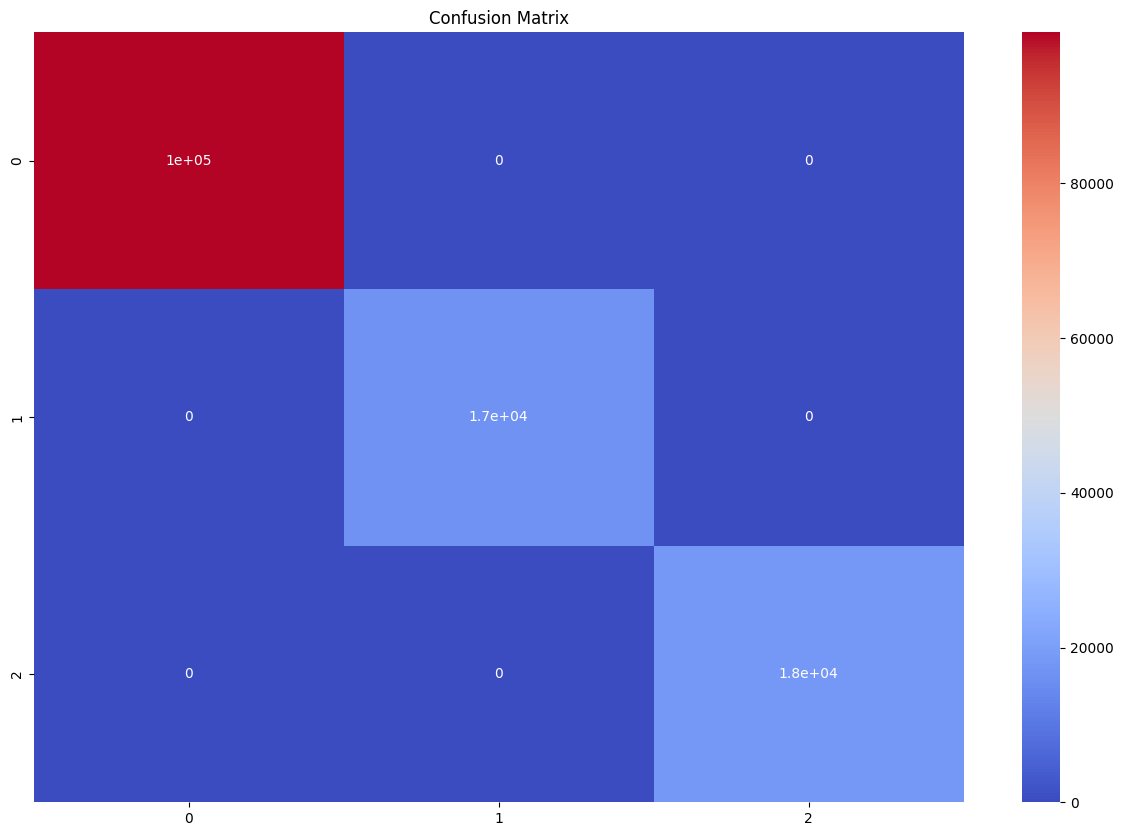

In [33]:
plt.figure(figsize=(15, 10))
sns.heatmap(cf, annot=True, cmap='coolwarm',)
plt.title('Confusion Matrix')
#plt.savefig('confusion.jpg')
plt.show()